%%latex
\tableofcontents 
\setcounter{section}{0}

# Abstract

The investigation of thick film semiconducting metaloxide gas sensors (SMOX) offers for a scientist many secrets to reveal. Hidden in the mystery of semiconductors most process are not available by simple measuring techniques. The general procedure of investigating a material follows the following lines:
A measuring technique is applied and based on the state-of-the-art understanding of the transduction mechanism the results are interpreted. The risk of getting to wrong conclusions are fairly high since the amount of assumption in the logical conclusion-path are quit high.

A major key figure measured is often the resistance of the sensor. Therefore one important elements in this logical path of conclusion is how electrical properties of the semiconductor influence the resistance of the sensor. Further more the how (relative) changes of the properties result in changes in the resistance. With this knowledge also other processes related to chemical surface reaction my be understood better. 

# Motivation
The research on semiconducting metal oxide gas sensors was focusing in the past mostly on scenarios, where oxygen is the most dominant reactive, gaseous, species in the proximity of the sensor. The adsorbed oxygen at the surface of the semiconductor lead to an interaction with the charges inside the thick film grains. Due to the trapping of the charge carrier by oxygen, a depletion layer is formed in the surface region of the semiconductor. Based on this depletion layer assumption, many investigations have successfully lead to a deep understanding of the sensing mechanism. 

Nevertheless, the assumption the existence of an depletion layer is not always valid. Recent experimental results have shown, that even under atmospheric conditions which are common in real live, the dominant impact of oxygen may be gone. It could be shown, that under conditions of 50% r.h. and low concentrations of CO (>1 ppm) in synthetic air, the depletion layer was gone and a accumulation layer manifested. The results are shown in Figure 

![Nitrogen switch](media/pics/external_plots/nitroline_switch_julia.jpg)

With the absence of the depletion layer also most simplifications are not valid anymore. Mainly the validity of the Schottky and Boltzmann approximation are not given anymore. Facing those facts the equations to describe the transduction mechanism for a specific electrical band configurations needed a more general descriptions, which includes a depletion and accumulation layer controlled transduction mechanism.

To describe such a semiconductor the set of differential equations is available in literature. Since the previously used simplifications for such problems are not valid in the generalized case, finding an analytically solution exceeded by far my intellectual capabilities.This is why a I chose to go a different. Find a numerical solution for the problem by using computational power

While working in the field of SMOX allready some years, I was used to describe transduction processes by assigning different parts of an analytical solution to properties of the sensor. With a numerical solution this is not possible anymore and this was certainly a drawback of this method. But on the other side the relation between an effect and a intrinsic property can be studied also in detail, when numerically solving the equations for multiple values of the intrinsic property. The influence of may be studied and an insight about the principles can be gained. Therefore the goal was first to break the problem of describing a SMOX sensor into smaller parts discreet parts and second trying to solve each of it individually.

In the upcoming chapters I will describe the different part and how they have been simplified, solved individually and combined again. Each part will also hold a section where experimental data is compared with the numerically gained results.

# Numerical calculation of semiconductors gas sensors

## Introduction

To elaborate the modeling of sensing, different equations, many of which are described in [sec:current models] such as the shape dependent Poisson equation or the combination between the Poisson equation, the electro-neutrality equation and the geometry dependent electrical current path, must be solved. In most cases, this is an extensive mathematical effort and therefore, the numerical computing environments Python will be used to derive numerical solutions for equations, which cannot be solved analytically, as shown below. Depending on the grains size the charge trapping at the surface has different impact on the potential and charge distribution inside the grain. For large grains compared to their Debye length ($L_D$), a charge transfer at the surface may be leave the bulk unaffected. In contrast to large grains, relative small grains may be affected through the whole grain (Figure [fig:Potential-for-spheriacal,small_1ld]). 

To understand the influence of a the charge transfer at the surface the resulting potential distribution which propagates inside the grain is from main importance. With this knowledge the free charge carrier concentration and a position dependent resistivity can be defined. 

When investigating the total resistance of one grain, the pathway through the grain plays a major role. The total resistance may vary a lot based on the an-isotropic resistivity distribution. 

In the simplest case of symmetric contacts on opposite sites, a graphical representation of the results from a numerical simulation of one grain with a small depletion layer is shown in (Figure 3). The resulting total resistance of one grain as a function of the surface potential can then be used as an approximation for the resistance of a full multi-grain - sensor. (Figure [fig:grain_simulation_small_depl]). The relation between surface potential change and resistance change may also be obtained experimentally as described in the previous paragraph with the Kelvin-Probe-Method (REF).By comparing the Kelvin-Probe-Data with the results from the numerical simulation a better understanding of the influence of the grain size on the performance can be gained. The fitting of the numerical parameters of the simulation to experimental data or generally fitting of data with an appropriate function can easily be performed in the presented environment. 

## Semiconductor properties of the SMOX grains

The advantages of industrialized production techniques are inline with general advantages of the SMOX-based sensor technologie. Both are:

• upscalable

• highly reproducible 

• low cost

Besides the benefits for the industrialization of such a material, also the resulting morphological are beneficial for a good sensor performance. The typical spherical grains with a narrow size distribution result in high surface to volume ration. Besides the high surface area, the high number of grain-grain contacts have a positive effect on the sensitivity of the sensor, due to the high number of back to back Schottky barriers. As described in [sec:current models]such barriers are of major importance for the sensing properties.

In the literature other geometries claim exceptional performances for multiple other shapes. As from hollow spheres to nano-rods, often the mechanism which explains the measured increase in performance is not explained. Since the aim is to gain a fundamental understanding of the shape influence while staying close to a industrialize material such exotic shapes I will keep the focus in this work on spherical grains, which are commonly used in commercial products. Nevertheless the techniques described in my work should be transferable to arbitrary and more complex shapes. 

Besides the shape also the defect concentration and stochastic composition varies a lot with the preparation process. One additional goal of this thesis is to gain a better understanding about the relation of these two properties and the sensor performance.


## Choice of geometric model

Both favorable preparation methods mentioned in the latter paragraph have been investigated under a REM (Figure [fig:REM_grain_SMOX]). The SMOX grains can be well approximated as spherical grains. The typical diameters of the grains are from 5nm to 200nm. The benefit by choosing of such a shape with a the rotational symmetry is the reduction of the complexity for the numerical calculation. Therefore the approximation of the SMOX particles as spheres was chosen. The second benefit of choosing materials prepared by rather standardized preparation routes is the availability of multiple different materials form varying laboratories around the world. These materials may vary in sizes and defect concentration but are often similar in shape. This fact is favorable when the numerical results are compared and validated with experimental data. 

[Picture of a typical SMOX-Sensor with the grains visible](WHAT!)

Other available materials with more specialized shapes as hallow spheres or fibers do exist, but will not be investigated in the research. In the first place the complex numerical description of such geometries will increase the calculation duration. Also the limited availability and variety in parameters as diameter, doping level, band gap, material composition are not favorable for to check the numerical model with experimental data.

## Poisson's equation

Reactions at the surface (see [sec:Surface-reactions]) result in a charge transfer between the bulk of a grain and the surface. This modification of the charge density distribution inside the grain causes again a change in resistivity . By moving charges to/away from the surface, electrical potentials through the grain are generated. The electrical potential at the surface and therefore the work function of the semiconductor changes (see [subsec:Work-function]). 

Previous studies have shown, that a direct relation between surface potential, surface charge and resistance exists. The latter studies initially define certain approximations which have been adapted and reasonable for the investigated cases, but do not allow a predictions outside the boundaries of the pre-assumption. Also the direct impact of size and geometric on the transduction is not taken fully into consideration. In order to have a more general model of the SMOX materials and to include the geometric effects, the charge distribution has to be solved in a more general way.

Identical to the previous studies the relation between surface potential and charge distribution has to be solved initially. This relation is defined by the Poisson-Law: 

\begin{align}
\nabla\phi=-\frac{\rho}{\epsilon\epsilon_{0}} \label{eq1}\tag{Poisson}
\end{align}

$\phi$=electrical potential, $\rho$=free charge density, $\epsilon$=vacuum permittivity, $\epsilon_{0}$=relative permittivity.

TODO TEM analysis of the crystal quality of one grain indicate a high crystalline quality. Therefore one can assume that $\epsilon$ does not vary inside the grain. The charge destiny $\rho$ on the other side is directly influenced by the charge transfer. Since the transfer of charges to the surface influences the work function and the energetic position of the conduction band, $\rho$ is a function of $\phi$. $\phi$ again depends on the position in the grain. At the surface $\phi(r=r_{S})$ corresponds to the surface potential $\phi_s$, while in the center $\phi(r=0)=\phi_b$ may have a different value. The exact shape of $\phi(r)$ is gained from solving the Poisson equation $(\ref{eq1})$.

It will be assumed, that the reactions take place a the surface of the crystal and bulk diffusion will be neglected. Even if there are reports of oxygen bulk diffusion for certain materials (Quelle), this is not the general behavior and does not apply apply for $SnO_{2}$. Since all surface sites will be accessible by the gas, the solution of [eq:poisson_eq]should have a rotational symmetry. In the case of multiple grains with grain-grain contacts this assumptions needs to be validated again.

In case of an rotational symmetric shape of a SMOX grain, equation [eq:poisson_eq]can be expressed as a ordinary differential equation of only the radius:

$(\frac{1}{r²})\frac{d}{dr}\frac{r²d\phi(r)}{dr}=-\frac{\rho(r)}{\epsilon\epsilon_{0}}$

Description of the coordinate system of one spherical symmetric SMOX grain....

## Charge density

As mentioned, the scope of my work was to investigate the transduction mechanism. Specially including the phenomena of a switch from a depletion- to accumulation layer controlled transduction mechanism. The previously shown conduction mechanism switch an experiment is shown, where such a switch occurs under application relevant environmental conditions (50% r.h. and ~3 ppm CO). The findings are described in detail in <cite data-cite="Barsan2015">"Conduction mechanism switch for SnO2 based sensors during operation in application relevant conditions; implications for modeling of sensing"</cite>.


To summarize the findings it can be said, that the resistance drops below the level obtained under inert conditions in nitrogen, which means that the material is getting more conductive that it is initially. The root cause of the higher conductivity is the increased number of free charge carrier in the conduction band. In contrast to a depletion layer controlled transduction mechanism a accumulation layer is formed while charges are pushed into the conduction band. 

In cases of depletion layer controlled transduction the Schottky-Approximation as described in the beginning was proven to be a effective way to describe and simplify the Poisson equation. In the case of a accumulation layer the assumption of a fully depleted space charge layer is not valid anymore. 

It should be mentioned, that a common second approximation often used together with Schottky's approximation is Boltzmann's approximation. The Boltzmann approximation is valid if the energetic difference between the energy E and the Fermi level energy $E_{Fermi}$ is high enough:
\begin{align}
E-E_{Fermi}\gg3k_{B}T
\end{align}
Then the Fermi-Dirac distibution $f(E)$ can be expressed with the Boltzmann distribution b(E):

\begin{align}
f(E)=\frac{1}{exp(\frac{E-E_{Fermi}}{k_{B}T})+1}\xrightarrow{Boltzmann\,Conditions}b(E)=exp(-\frac{(E-E_{Fermi})}{k_{B}T})
\end{align}

Based on the findings, that the flat band situation is reached in application relevant conditions, the Boltzmann approximation i not valid anymore. Operando Kelvin Probe (see: [subsec:Kelvin-Probe]) experiments indicate, that the surface potential may drop up to 1eV below the nitrogen level <cite data-cite="Barsan2015">"Conduction mechanism switch for SnO2 based sensors during operation in application relevant conditions; implications for modeling of sensing"</cite>. The typical difference $E_{Conduction}-E_{Fermi}$ is between 50meV and 300meV. It is reasonable to expect, that the conduction band may even cross the Fermi level and therefore also the conditions necessary for the Boltzmann approximation do not exist. In the upcomming calculations I will calculate and show relative error, when using the Boltzmann approximation for a relevant range of energy bendings of the conduction band. 

<cite data-cite="Barsan2011a">{Conduction mechanisms in SnO2 based polycrystalline thick film gas sensors exposed to CO and H2 in different oxygen backgrounds}</cite> and its validity for the case of an accumulation layer will be shown in the upcoming calculations.

To unify all transduction mechanisms into on numerical calculation the Fermi-Dirac distribution, without further simplification, is used to calculate the charge distributions. 

We will begin by rewrite the Fermi-Dirac equation to a suitable format, which will reflect the the occupation probability at energies relative to the initial conduction band position $E_C$:

Ferimi-Dirac:
\begin{align}
f(E)=\frac{1}{exp(\frac{E-E_{Fermi}}{k_{B}T})+1}=\frac{1}{exp(\frac{E-E_{C}+E_{C}-E_{Fermi}}{k_{B}T})+1}=\frac{1}{exp(\frac{E_{C}-E_{Fermi}}{k_{B}T})*exp(\frac{E-E_{C}}{k_{B}T})+1}
\end{align}

The density of states is given by [#Sze2007]for and electron in the conduction band with the effective mass m^{*}as followed: DERIVE NUMERICALLY!

\begin{align}
N_{E_{C}}\left(E\right)=\frac{\sqrt{2}}{\Pi^{^{2}}}\frac{\sqrt{E-E_{C}}}{\hbar^{3}}m^{*^{\frac{3}{2}}}=4\Pi*\frac{\left(2*m^{*}\right)^{\frac{3}{2}}}{h^{3}}*\sqrt{E-E_{C}}
\end{align}

With the occupation probability $f(E)$ and the density of states $N(E)$ the number of charges in the conduction band can be calculated:
\begin{align}
n\left(E_{C}\right)=\intop_{E_{C}}^{inf}N_{E_{C}}\left(E\right)*f\left(E\right)dE
\end{align}

Typically this equation is simplified to the following form. Such an analytical equation is useful for further alaytical calculations but is not  necessary for our numerical approach:

\begin{align}
n(E_{C})=N_{C}exp\left(\frac{E_{F}-E_{C}}{k_{B}T}\right)\label{n}\tag{$n(E_C)$}
\end{align}

with $N_{C}=2\left(\frac{2\Pi m_{e}^{*}k_{B}T}{h²}\right)^{\frac{3}{2}}$, the effective density of states in the conduction band.
It is worth-wise to mention, that this simplification is only valid if also the Boltzmann approximation is valid. 

Equation [eq:integral_n] was solved numerically and compared with the results obtained with the common approximations( $m_{e}^{*}=0.3m_{e}$ for $SnO_{2}$ <cite data-cite="Batzill2005">(The surface and materials science of tin oxide)</cite> was chosen .

Previous publications prove, that above a operation temperature of 300°C, all donors are ionized and available as free charge carriers in the conduction band <cite data-cite="Barsan2015">"Conduction mechanism switch for SnO2 based sensors during operation in application relevant conditions; implications for modeling of sensing"</cite>. If some of those electrons are trapped at the surface due to surface reaction, a positive charge remains localized in the crystal at the donors position. Additionally the energetic position of the conduction band increases with electron trapped at the surface. Out of the combination of conduction band shift $E=E_{C}-E_{C_{b}}$ and equation \ref{n}, one can calculate now the free charge carrier density $\rho$ from Poisson's equation.

In the case of an unaffected bulk, $n(E_{C_{b}})\equiv n_{b}$ is the density of electrons in the conduction band. In case of a charge transfer to/from the surface, the number of electrons in the conduction band will change. The relation between the density of charges in the conduction band $n(E_{C})$ and the shifted, new energetic position of the conduction band $E_{C}$ is fixed by equation \ref{n}. The difference between $n_{b}$ and $n(E_{C})$ is the density of the positive, ionized donors remaining in the crystal. Those remaining donors are the cause of the electrical screening of the surface potential. The decay of the energetic conduction band position from the surface energy back to the 'bulk position' depends directly on that number. With this relation a energy dependent charge density can be formulated as followed:

\begin{align}
\frac{\rho(E)}{e}=n(E_{C_b})-n(E) = n_{b}-n(E)
\end{align}

Equation \ref{n} becomes then:

\begin{align}
\left(\frac{1}{r²}\right)\frac{d}{dr}\frac{r²d\phi}{dr}=-\frac{\rho\left(E\left(r\right)\right)}{\epsilon\epsilon_{0}}=-\frac{e\left(n\left(E_{C_{b}}\right)-n\left(E\right)\right)}{\epsilon\epsilon_{0}}=-\frac{e\left(n_{b}-n\left(E\right)\right)}{\epsilon\epsilon_{0}}\label{poisson_spherical}\tag{Poisson spherical}
\end{align}

With $E=V*e=(\Phi_{0}-\Phi)*e$

“In discussions of semiconductos, it is useful to define a "band bending" function $V$ such that $eV$ is related to the potential energy of an electron”<cite data-cite="S.RoyMorrison1977"> The Chemical Physics of Surfaces, Morrison, 1977</cite>::

$V=\phi_{b}-\phi,\;E=V*e$

With this relation equation (\ref{poisson_spherical}) becomes:

\begin{align}
\left(\frac{1}{r²}\right)\frac{d}{dr}\frac{r²dV}{dr}=\frac{e\left(n_{b}-n\left(E\right)\right)}{\epsilon\epsilon_{0}}\label{poisson_spher_v}\tag{Poisson spherical (V)}
\end{align}

The goal will be to calculate how potential at the surface is electrically screen by the remaining positive charges in side the grain. An important parameter for such calculations is the Debye length. In cases where the Boltzmann approximation is valid, the Debye length can be approximated with the following formula. In this case the given length is the distance needed to screen a potential $V$ until its value reaches $\frac{V}{e}$

\begin{align}
L_{D}=\sqrt{\frac{\epsilon\epsilon_{0}k_{B}T}{n_{b}e^{2}}}
\end{align}

With the definition of the Debye length I can now transform the relevant variables of the calculation.

* The distance inside the grain r is expressed in units of the Debye length $L_{D}$ :

    $r^{*}=\frac{r}{L_{D}}, \frac{dr^{*}}{dr}=\frac{1}{L_{D}}\longrightarrow dr=dr^{*}*L_{D}$
    
* The position of the conduction band inside the grain in units of the $\frac{k_{B}T}{e}$:

    $V^{*}=\frac{e}{k_{B}T}*V, \frac{dV^{*}}{dV}=\frac{e}{k_{B}T}\longrightarrow dV=dV^{*}*\frac{k_{B}T}{e}$


* And the number of free charge carries in units of the intrinsic number of charges $n_b$:

    $n^{*}(V^{*})=\frac{n(V)}{n_{b}}$
    

By substituting those unit-less parameters in equation (\ref{poisson_spher_v}), one obtains the a unit-less Poisson equation suitable for the numerical calculations:

\begin{align}
\frac{1}{r^{*2}}\frac{d}{dr^{*}}{r^{*}}^{2}\frac{dV^{*}}{dr^{*}}=1-n^{*}(V^{*})\label{poisson_no_units}\tag{Unitless Poisson equation}
\end{align}

This step of substituting the equation with unit less parameters is not obligatory for the the numerical calculations. As I will show in the next part of the thesis, the numerical calculation is also be possible with the initial spherical Poisson equation (\ref{poisson_spher_v}). Therefore the material specific parameters need to be given to the algorithm. The downside would be, that for every new material with any parameter changing, the calculation would need to be redone.
The benefit of the latter derived equation is that it is valid for multiple combinations of intrinsic parameters. The solution would only depend on three parameters:

* Grainsize $R$ in units of $L_{D}$
* Temperature $T$ as in $\frac{k_{B}T}{e}$
* The doping level of the semiconductor described with $n_b$

The advantage of the numerical approch is now, that for typical values of these parameters the solution are computed and used for further understanding of their influence on sensing with SMOX material. Typical values of the relevant parameters are:

* Typical grainsizes reach from 0.1 to 100 $L_D$
* Typical temperatures are in the range of 100°C to 400°C
* The doping level $n_b$ range from $10^{19}\frac{1}{m^3}$ to $10^{25}\frac{1}{m^3}$

This indicates just the typical materials, but solutions for other parameters are alos possible. For the scope of my work I will nevertheless concentrate on the gives ranges.

## Poisson equation as system of ODEs

The Python SciPy package <cite data-cite=Jones>(SciPy)</cite>  will now be used to numerically solve the derived equations. The odesolvers of scipy solve first order ODEs, or systems of first order ODES. To solve a second order ODE, we must convert it by changes of variables to a system of first order ODES.

Equation (\ref{poisson_no_units}) is an ODE of second order, so it first had to be converted by changes of variables to a system of first order ODES. 

Practically a functions needs to be written, which gets as input an array of values and returns returns an array of the derived values:

EXPLAIN HOW OED SOLVER WORKS


\begin{align}
derive\_func\left(V^{*},\frac{dV^{*}}{dr^{*}}\right)\longrightarrow\frac{dV^{*}}{dr^{*}},\frac{dV^{*2}}{dr^{*2}}
\end{align}

The the second input term $\frac{dV^{*}}{dr^{*}}$ corresponds already to the first output term. So no special work needs to be done here. But also the second output parameter can be calculated with the given input parameters by using unitless poisson equation (\ref{poisson_no_units}).

\begin{align}
\frac{1}{r^{*2}}\frac{d}{dr^{*}}{r^{*}}^{2}\frac{dV^{*}}{dr^{*}}=1-n^{*}(V^{*})=\frac{2r^{*}}{r^{*2}}\frac{dV^{*}}{dr^{*}}+\frac{r^{*2}}{r^{*2}}\frac{d²V^{*}}{dr^{*2}}=\frac{2}{r^{*}}\frac{dV^{*}}{dr^{*}}+\frac{d²V^{*}}{dr^{*2}}=1-n^{*}(V^{*}) 
\end{align}

\begin{align}
\frac{d²V^{*}}{dr^{*2}}=1-n^{*}(V^{*})-\frac{2}{r^{*}}\frac{dV^{*}}{dr^{*}}\label{second_derivative}\tag{Second derivative}
\end{align}

The odesolver needs beside the derive-function additional parameters. Namely a set of initial start values for $V^{*}$ and $\frac{dV^{*}}{dr^{*}}$ and boundaries between the solver should calcualte the solution. Since we first want to calculate the shape of the conduction band for different surface potentials $V^{*}$, the initial parameter is already defined $V^{*}$ .  Also the boundaries should be the boundaries of the grain, r^* between 0 and the grainsize R^*.

$odesolver(derive\_func,[V^{*}{}_{init},\frac{dV^{*}}{dr^{*}}_{init}],r)\longrightarrow V^{*}(r^{*}),\frac{dV^{*}}{dr*}(r*)$

If such a function can be defined, the solver is able to solve the system of equation interactively starting from a given initial condition.

## Constants
For the numerical calculations I will need to use some constants to refer to. To structure this notebook it is favorable to concentrate the definition at a single point and refer always back to this definition. This reduces the potential error of typos when using some constants over and over again.

One way to generate a global object which groups the relevant information together and allows to access them easily are classes. Such classes do not only store the relevant information but offer also some useful functionalities related to the stored information.

In the following code block, the class is defined with the statement `class`. What the follows `class` statement is the name of the class. By convention class names start with a capital letter. Inside the `class` initially one function called `__init__` is defined with the `def __init__(self):` statement. This special function is always automatically executed when an instance of the class is created. Here I define some constants, which are relevant for course of this thesis. 
I also add some useful functions, e.g. the conversion from Celsius to Kelvin and vise versa. Such functions will be of mayor importance when doing the knowledge transfer gained in the 'semiconductor regime' (Kelvin is the useful scale here) to application relevant conditions (where Celsius is the usual temperature scale).



In [2]:
from scipy import constants as sciConst
class Constant:
    def __init__(self):
        self.K0 = sciConst.convert_temperature(0,'C','K')
        self.kB=sciConst.k
        self.EPSILON_0 = sciConst.epsilon_0
        self.E_CHARGE = sciConst.elementary_charge
        self.h = sciConst.h
        self.MASS_E = sciConst.electron_mass
        self.NA= sciConst.N_A
        self.VOL_mol = 22.4
        self.mole_per_l = self.NA/self.VOL_mol
        
    def K_to_C(self, K):
        return sciConst.convert_temperature(K, 'K', 'C')

    def C_to_K(self, C):
        return sciConst.convert_temperature(C, 'C', 'K')
    
    def eV_to_J(self,eV):
        return eV*self.E_CHARGE
    
    def J_to_eV(self,J):
        return J/self.E_CHARGE
    
    
CONST = Constant()


Once the basic constants are defined, creating also a simplified numerical representation of the investigated semiconducting material. The specific properties of the semiconductor will result in individual properties as the charge distribution. As explained in the theoretical section, the charge distribution $n$, depends on the position of the conduction band.
Again start with setting up a numerical python lab, which will output all results "inline" with this document. As shown in the introduction this is done by using the magic command `%pylab inline`

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Materials

### Solving integrals numerically

#### Introduction
Many observables in nature can be predicted with the solution an integral of a certain function. In this section I will make a short excursion  on how to solve integrals numerically.

From my experience, many students and researches excellently trained to define the set of equations describing their problems mathematically. Seconds, the evaluation of the individual equations with multiple variables imposes (in most cases) no problem. Third, it is also part of the common knowledge, that the integral of any function is equivalent to the area below the curve. A college of mine once told me, that she learn calculating the integral in school by:
1. drawing the function for multiple points on a paper
2. combine them with a line
3. count the squares below the curve

Nothing else is done, when solving integrals numerically.

On the other side solving an integral analytically requires in many cases advanced mathematical skills and often approximation/simplifications  are introduces to be able to solve the problem. Those tasks are often hard to master for many people (I continuously fail at solving integral) and the simplifications often reduce the solution to specific boundary conditions (as for example the Boltzmann approximation).

As mentioned solving integrals numerically is fairly easy, even if one might not feel very comfortable with counting squares. But even if counting is not an option, there are modern tools to solve this task very efficiently! If haven't been introduced yet, here they come!

So if the elements to be integrated can evaluated for each point between the boundaries of the integral, not much is in the way to solve the integral numerically.
Here a simple example of solving: $\intop_{3}^{5}x{{}^5}dx$

The analytical solution solution is:
$\left[1/6x^6\right]_{3}^{5}=1/6*5^6-1/6*3^6\backsimeq2482.67$


#### The `quad` function
The `quad` function from the `scipy.integrate` package will be used to integrate the given function. The `quad` needs as comma separated inputs the 
1. function to integrate
2. the lower integration boundary
3. the upper integration boundary

The help file of `quad` says:
>Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.

This description reveals, that the Fortran library QUADPACK is used in the background. So nothing new is shown here from the "scientific" point of view. I'd rather like to point out, how easy this can be applied in a Jupyter notebook. From discussion with colleagues I know, that the biggest challenge is how to technically implement the numerical solving algorithm in Python. So here it comes:

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
from scipy.integrate import quad

def f(x):
    # return x to the power 5
    return x**5

num_sol, num_error = quad(f,3,5)
ana_sol = 1/6*(5**6-3**6)

print(f'Numerical solution: {num_sol:.2f} +- {num_error:.2f}')
print(f'Analytical solution: {ana_sol:.2f}')


Numerical solution: 2482.67 +- 0.00
Analytical solution: 2482.67


In this case, the numerical and the analytical solution result in the same results.
How about a more complex problem? Let's look at the "Normal distribution":
\begin{align}
f(x)=\frac{1}{\sqrt{2\Pi}}*e^{-\frac{x²}{2}}
\end{align}
Since the probability distribution is normalized the integral from $-\infty$ to $\infty$ is 1:
\begin{align}
\intop_{-\infty}^{\infty}f(x)dx=1
\end{align}
The analytical solution of this integral is already a rather advanced task, but still doable.
The numerical results are obtained in the following cell.

In [6]:
def f(x):
    return 1/(2*pi)**0.5*e**(-(x**2/2))

num_sol, num_error = quad(f, -np.inf,np.inf)
ana_sol = 1

num_sol, num_error = quad(f, -inf,inf)
ana_sol = 1

print(f'Numerical solution: {num_sol:.12f} +- {num_error:.12f}')
print(f'Analytical solution: {ana_sol:.12f}')

Numerical solution: 1.000000000000 +- 0.000000010178
Analytical solution: 1.000000000000


Also here a numerical solution is in line with the expected result from the analytic solution.

There two examples cover functions, where a analytical solution is known. In the following parts of this thesis, many analytical solutions are not known. In this case the shortcut of using a numerical solution instead of relaying on the exact solution is reasonable.

#### Side-Note:
The `quad` function does not only give back the numerical solution, but also an estimate of the absolute error in the result.

The `print()` statement is used to add the results in the output of the notebook. The `print` command requires a text *string* between its parenthesis. In Python a *string* consists of multiple characters between quotation marks: e.g. `'L3TT3R5'`. Additionally another rather new feature of Python is used here. This feature is called *formatted strings*.
*Formatted strings* are constructed with an `f` in front of the *string*: `f'L3TT3R5'`.

For formatted strings variables inside curly parenthesis are then replaced with their string representation. The formatting of the representation may be given after `:`. For example `.12f` tells the formatter to represent the variable as a float with 12 digits after the decimal separator. When reading this as an interactive notebook, feels free to modify the formatting statement and check the result. 


### Numerical description of the semiconductor

#### Helper functions for semiconductor calculations
Michael Hübner (page 50) derived in his thesis a way to approximate the energetic difference between the the level of the Fermi-Level and the conduction band (in a flat band situation) depending of the temperature $T$ and concentration of defects in the bulk of the grain $n_b$ and the effective mass of electrons inside the semiconductor $m_e^*$. Both $m_e^*$ and $n_b$ are difficult to measure experimentally.
This thesis will initially start with reasonable values found in literature to derive the required set of equations describing the transduction. 

For a the later deep analysis those two parameters part of a set of parameters to be screen for the analysis of their influence on the overall performance of a sensing material. 

Based on Michael Hübners work now possible to derive a value for the energetic distance between Fermi level and conduction band $\Delta E_FE_C$. 

Since the energetic distance from the Fermi level mainly defines the occupation probability of the states in the conduction band, this term is of major importance.
It should be pointed out, that the calculation in the thesis are based special assumption only valid for $SnO_2$. The definition is translated into a Python algorithm and used as an starting point for further calculations. Besides this function also two other "helper functions" are defined which will be used at multiple places in the upcoming calculations.

In [7]:
import scipy 
def calc_kT(T_C):
    """
    Calculate the kT value for a temp. in °C
    T_C = Temp in °C
    """
    
    kT = CONST.kB*(CONST.C_to_K(T_C))
    return kT

def calc_eff_density_of_states(T_C,mass_e_eff_factor):
    """
    Calculate the eff. densitiy of states in the conduction band
    T_C = Temp in °C
    mass_e_eff_factor = material specific factor to calculate the effective mass from the electron mass
    """
    
    kT = calc_kT(T_C)
    MASS_E_EFF = mass_e_eff_factor*CONST.MASS_E
    NC = 2*(2*np.pi*MASS_E_EFF*kT/(CONST.h**2))**(3.0/2.0)
    return NC

def calc_EDCF_by_temp(T_C, ND,mass_e_eff_factor):
    """
    T_C = Temperature in °C
    
    ND = number of donors per m³
    ND = 9e21 # 9*10**15 cm**3 Mich Thesis Seite 50
    
    mass_e_eff_factor = material specific factor to calculate the effective mass from the electron mass
    """
    
        
    kT = calc_kT(T_C)
    
    NC = calc_eff_density_of_states(T_C,mass_e_eff_factor)
    
    ED1C_eV = 0.034
    ED2C_eV = 0.140
    
    a = np.exp(CONST.eV_to_J(ED1C_eV)/kT)
    b = np.exp(CONST.eV_to_J(ED2C_eV)/kT)
    t3 = 1.0
    t2 = (1.0/b-0.5*NC/ND)
    t1 = -1.0/b*NC/ND
    c = -1.0/(2*a*b)*NC/ND

    poly_params = (c,t1, t2, t3)


    solutions=numpy.roots(poly_params)
    EDCFs = []
    for sol in solutions:
        if sol.imag == 0:
            EDCF = np.log(sol.real)
            EDCFs.append(-EDCF*kT/CONST.E_CHARGE)
    if len(EDCFs)>1:
        raise Exception('Should not be...')
    else:
        return EDCFs[0]

T_C = 300
ND = 9e21
mass_e_eff_factor =0.3

EDCF_eV = calc_EDCF_by_temp(T_C, ND, mass_e_eff_factor)


#### Define the smox-material class
With the helper functions a new class for the describing the actual semiconducting material. This class should be initialized with the relevant parameters (in the scope of this thesis). Besides this the `class Material` should hold some methods to calculate relevant values as the concentration of charge carries in the conduction band for multiple positions of the conduction band.

From literature the definition of the charge carrier density is known. It is the integral of the product of density of states $g_C$ in the conduction band and  occupation probability $f_F$. Typically the integral is solved analytically by introducing some simplifications. This is possible in cases, where the Boltzmann approximation is valid. In such cases the integrand can be simplified so that the integral can be solved.
By additionally solving the integral numerically the solutions can be compared. As shown earlier in this thesis, the numerical solution of the integral by using the `quad` function is easy achieve.

#### How to derive the charge density (PDF copy, source unknown, sorry)
![title](media/DensityOfStates.png)

In [8]:
from scipy.integrate import quad
from scipy.interpolate import interp1d
import scipy
from functools import lru_cache
import numpy as np
import pandas as pd



class Material:
    def __init__(self,T_C,ND,
                  mass_e_eff_factor = 0.3, EPSILON = 9.86, DIFF_EF_EC_evolt = None):
        '''
        T_C = Temperature of the material
        ND = number of donors per m³
        DIFF_EF_EC_evolt = E_condution - E_Fermi 
        '''
        self.EPSILON = EPSILON
        self.ND = ND
        self.MASS_E_EFF = mass_e_eff_factor*CONST.MASS_E
        self.T_C = T_C
        self.kT = calc_kT(self.T_C)
        self.NC = calc_eff_density_of_states(T_C,mass_e_eff_factor)
        

        if DIFF_EF_EC_evolt:
            self.Diff_EF_EC_evolt = DIFF_EF_EC_evolt
        else:
            self.Diff_EF_EC_evolt = calc_EDCF_by_temp(T_C, ND, mass_e_eff_factor)
        self.Diff_EF_EC = CONST.eV_to_J(self.Diff_EF_EC_evolt)

        self.nb, self.nb_err = self.n(0)
        self.LD = np.sqrt((self.EPSILON*CONST.EPSILON_0*self.kT)
                          /(self.nb*(CONST.E_CHARGE**2)))
    
    def J_to_kT(self,J):
        return J/self.kT
    
    def kT_to_J(self,E_kT):
        return E_kT*self.kT
    
    def densitiy_of_states(self,E, E_c):
        return 4*np.pi*(2*self.MASS_E_EFF)**(3.0/2.0)/CONST.h**3*(E-E_c)**0.5
    
    def fermic_dirac(self,E_c):
        '''
        Calculate the value for the Fermi-Dirac distribution for an energetic
        position relative to the material specific conduction band E_c
        E = E_c+Diff_EF_EC+E_Fermi
        So the term in the Fermi-Dirac distribution E-E_Fermi will become
        E_c+Diff_EF_EC+E_Fermi-E_Fermi = E_c+Diff_EF_EC
        TODO: THIS SHOULD BE IN THE TEXT ABOVE SOMEWHERE
        '''
        if (E_c+self.Diff_EF_EC)/self.kT>100:
            f = 0
        else:
            f=1.0/(1+np.exp((E_c+self.Diff_EF_EC)/self.kT))
        
        return f

    def n_E(self,E,E_c):
        if E<E_c:
            n = 0
        else:
            n = self.densitiy_of_states(E, E_c)*self.fermic_dirac(E)
        return n
                                   
    @lru_cache(maxsize=512*512*512)
    def n(self, E_c):
        n, n_err = quad(lambda E:self.n_E(E, E_c),E_c,E_c+self.kT*100)
        return n, n_err

    
T_C = 300
ND = 9e21
mass_e_eff_factor =0.3

EDCF_eV = calc_EDCF_by_temp(T_C, ND, mass_e_eff_factor)

print(f'For SnO2 at {T_C}°C with a defect concentration of {ND} 1/m³, the value of EDCF_eV is {EDCF_eV} eV')    
material = Material(T_C,ND, DIFF_EF_EC_evolt=EDCF_eV)


For SnO2 at 300°C with a defect concentration of 9e+21 1/m³, the value of EDCF_eV is 0.31635452989085217 eV


#### Hint:
`@lru_cache(maxsize=512*512*512)` is a decorator for the function n(self, E_c). 

> "By definition, a decorator is a function that takes another function and extends the behavior of the latter function without explicitly modifying it." (https://realpython.com/primer-on-python-decorators/)

This Python decorator is used to speed up the calculation process. The lru_cache ("Last Recently Used") is used to cache the input and output of a certain function. As the description of the function says:

> "It can save time when an expensive or I/O bound function is periodically called with the same arguments"

Since in our numerical calc. we will often need to derive the charge density the `@lru_cache` is of great use here. The maxsize argument in the brackets defines the maximal size of the cache in the memory of the computer.

#### Free charge carrier conc. using the Boltzmann approximation

Besides the full numerical solution, also the solutions derived from the Boltzmann approximations need to be defined. As described in [REFERENCE] this breaks down to the following functions:

In [9]:
def boltzmann_acc(material, E_c):
    return np.exp(-(E_c+material.Diff_EF_EC)/(material.kT*2))

def boltzmann(self,E_c):
    return np.exp(-(E_c+material.Diff_EF_EC)/material.kT)

def densitiy_of_states(self,E, E_c):

    return 4*np.pi*(2*material.MASS_E_EFF)**(3.0/2.0)/CONST.h**3*(E-E_c)**0.5

def n_boltzmann(self,E_c):

    return boltzmann(material,E_c)*material.NC

def n_boltzmann_acc(self,E_c):

    return boltzmann_acc(material,E_c)*material.NC

#### Compare the numerical solution with the approximations

With all the definitions in place, the different solutions can be compared. This will be done be representing the charge carrier concentration $n$ for the different solutions for multiple positions of the conduction band $E_C$ in units of $kT$.

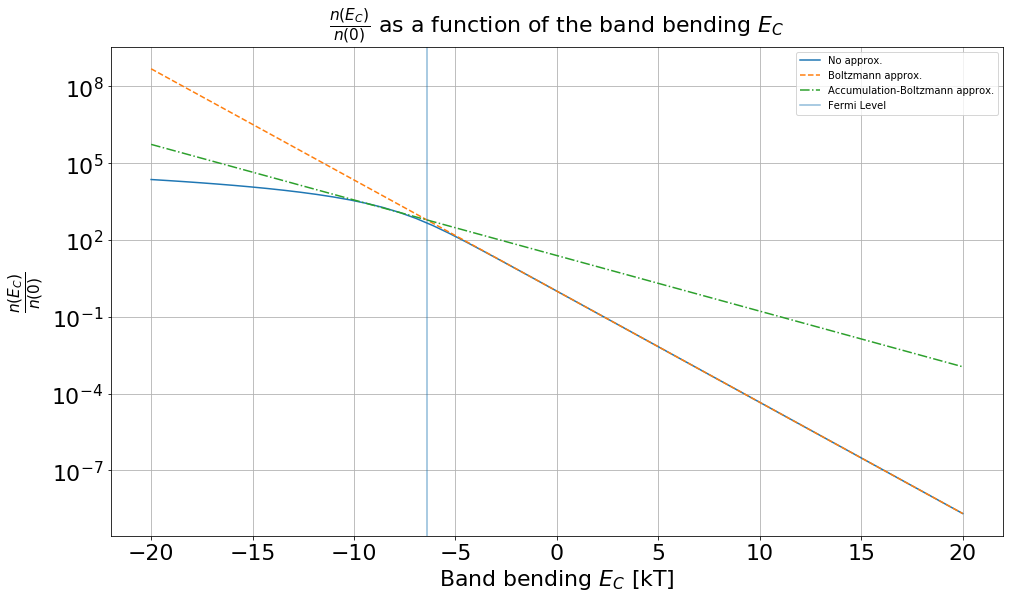

In [23]:
def plot_material_char(mat):
    ns = []
    n_boltzs = []
    n_boltzs_acc = []
    E_c_kts = []
    for i in np.linspace(-20,20):
        E_c = mat.kT_to_J(i)
        E_c_kts.append(i)
        ns.append(mat.n(E_c)[0]/mat.nb)
        n_boltzs.append(n_boltzmann(mat, E_c)/mat.nb)
        n_boltzs_acc.append(n_boltzmann_acc(mat, E_c)/mat.nb)
    
    
    fermi_level_pos_kt = -mat.J_to_kT(mat.Diff_EF_EC)
    
    fig, axe = subplots(1,figsize = (16,9))

    axe.plot(E_c_kts, ns, label='No approx. ')
    axe.plot(E_c_kts, n_boltzs, '--', label='Boltzmann approx.')
    axe.plot(E_c_kts, n_boltzs_acc, '-.', label='Accumulation-Boltzmann approx.')
    axe.set_yscale('log')
    axe.set_title('$\\frac{n(E_C)}{n(0)}$ as a function of the band bending $E_C$', fontsize=22)
    axe.set_xlabel('Band bending $E_C$ [kT]', fontsize=22)
    axe.set_ylabel('$\\frac{n(E_C)}{n(0)}$', fontsize=22)
    axe.axvline(fermi_level_pos_kt, label='Fermi Level', alpha=0.5)
    axe.tick_params(axis='both', which='major', labelsize=22)
    axe.legend()
    axe.grid(b=True)
    return fig 
material = Material(T_C,ND)
fig = plot_material_char(material)

The numerical solution and the approximations are inline with each other in their specific regions of $E_C$. The Boltzmann approximation is identical to the numerical solution starting ~3kT above the Fermi energy level. The approximation for the accumulation layer has its validity in a region where an accumulation is present. This was already shown in <cite data-cite=Barsan2011a>Conduction mechanisms in SnO2 based polycrystalline thick film gas sensors exposed to CO and H2 in different oxygen backgrounds</cite>.

### Numerical description of the semiconductor grains
In this section we define a SMOX grain. We approximate the grain as a sphere composed out of a material we previously defined. For one grain, the Poisson equation with spherical symmetry is solved. The transfer of the findings from a material to an actual grain are important for multiple reasons. On the one side the ratio of the available surface sites to react with the semiconductor and its bulk size play an important role. Very small grains may have relatively high concentration of surface sites but lack of electrons needed for the reaction a t the surface. So a grain may get fully depleted which may have significant an influence on the overall conduction.
On the other side, the conduction path through the grain differers depending on the free charge carrier concentration.
Those two relevant properties can only be analyzed, if the transfer from a material to an actual grain is solved.

To solve the Poisson equation, we will need to supply the solver with the initial values. Tow values need to be supplies. The goal of the solver is to find the shape of the conduction band inside the grain. This depends on the position at the surface. This value can experimentally be measured with the Kelvin Probe method.
The second start parameter, which needs to be supplied is the slope of the curve at the surface. With these two parameters, the solver iterates from the starting condition stepwise though the grain and calculates for each step new values based on the previous iteration.

This "inital value problem" is solved with the scipy tool solve_ivp.


In [24]:
from scipy.integrate import solve_ivp
class Grain:
    def __init__(self,grainsize_radius,material,rPoints=100):
        self.R = grainsize_radius
        self.material = material
        self.rs = self.R*(1.0-np.logspace(0,3,num=rPoints)/1e3) #calcualtion points from surface to center (not lnear spaced)
        self.rs = np.linspace(self.R/1000, self.R, 1000)
    
  
    def solve_with_values(self,E_init, E_dot_init):
        r = self.rs/self.material.LD
        E_init_kT = self.material.J_to_kT(E_init)
        E_dot_init_kt = self.material.J_to_kT(E_dot_init)

        #the solver should stop, when the slope is zero. This is reasonable since if the slope is zero, this should be the lowest point of the graph
        #so, when we "hit_ground" the solver should stop, to save some computational time
        def hit_ground(t, y): return y[1]
        hit_ground.terminal = True
        
        #this is the solver
        data = solve_ivp(self.deriv_E_E_dot,(r[-1],r[0]),  [E_init_kT,E_dot_init_kt], events=hit_ground, method = 'Radau',max_step=max(r)/1000)
        
        #since we start the iteration to solve the equation from the outside, the results have to be revered 
        r = data.t[::-1]
        v = data.y[0][::-1]
        v_dot = data.y[1][::-1]

        return r,v, v_dot, data


    def deriv_E_E_dot(self,r_, U_U_dot):
        U = U_U_dot[0]
        U_dot = U_U_dot[1]
        E = self.material.kT_to_J(U)
        n = self.material.n(E)
        U_dot_dot = 1-n[0]/self.material.nb -2/r_*U_dot
        return [U_dot, U_dot_dot]

grain = Grain(100e-9,material)

In [26]:
#define a grain with a specific material
def create_grain(grainsize, T_C, ND):
    mass_e_eff_factor =0.3

    material = Material(T_C,ND)
    grain = Grain(grainsize_radius=grainsize,material=material)
    return grain

#Check the influence of LD

g = create_grain(100e-9, T_C=300, ND=9e21)
print(g.R/g.material.LD)


g = create_grain(50e-9, T_C=300, ND=9e21*4)
print(g.R/g.material.LD)





2.5852950260293164
2.5826601447764097


In the following graph an example is given, where the initial value of $V^*$ is fixed, an different values of the surface slope are used to solve the equation.

In the previous cells we already initialized the `material` and `grain` object with reasonable parameters. First we initialize the grain with a material and calculate the solutions of the Poisson equation for multiple start parameters.

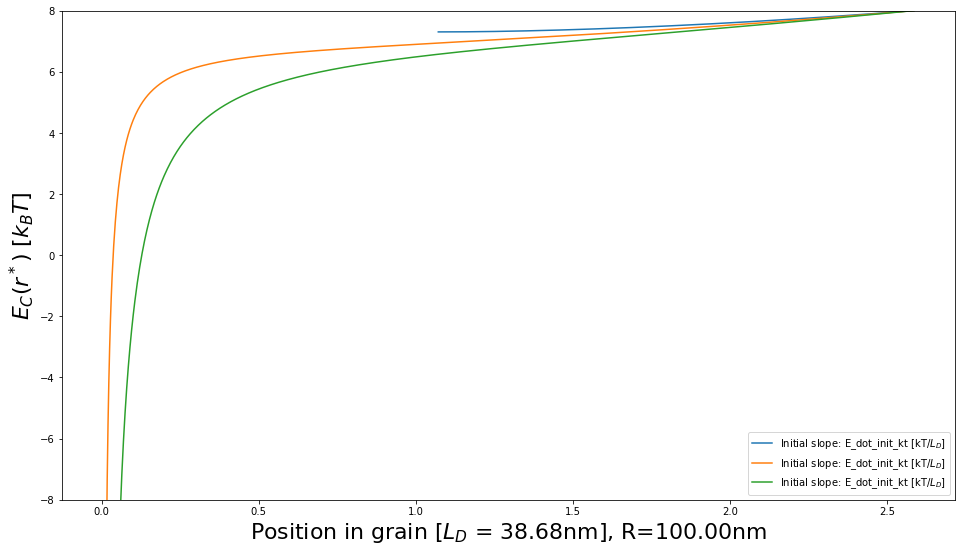

In [27]:
fig, axe = subplots(figsize = (16,9))
axe.set_ylim(-8,8)

E_init = grain.material.kT_to_J(8)
for E_dot_init_kt in [0.8,0.9,1]:
    E_dot_init = grain.material.kT_to_J(E_dot_init_kt)
    r,v, v_dot, data = grain.solve_with_values(E_init, E_dot_init)


    axe.plot(r,v, label='Initial slope: E_dot_init_kt [kT/$L_D$]')
    axe.set_xlabel
axe.set_ylabel('$E_C(r^*)$ [$k_BT$]', fontsize =22)
axe.set_xlabel(f'Position in grain [$L_D$ = {grain.material.LD*1e9:.2f}nm], R={grain.R*1e9:.2f}nm', fontsize =22)
leg = axe.legend()

    

From this graph it is obvious, that the initial slope has a major influence on the result.

Unfortunately this value is not known. On the other side, I can relay on an equation to check my solution. We will use the derived equation (\ref{second_derivative}) from the Poisson equation:

\begin{align}
\frac{d²V^{*}}{dr^{*2}}=1-n^{*}(V^{*})-\frac{2}{r^{*}}\frac{dV^{*}}{dr^{*}}
\end{align}

This equation can be transformed into following form:

\begin{align}
\intop_{0}^{R}\frac{d²V^{*}}{dr^{*2}}dr^*=\left[\frac{dV^{*}}{dr^{*}}\right]_{0}^{R}=\left.\frac{dV^*}{dr^{*}}\right|_{R}=\intop_{0}^{R}1-n^{*}(V^{*})-\frac{2}{r^{*}}\frac{dV^{*}}{dr^{*}}dr^*\label{second_derivative}\tag{Surface slope}
\end{align}

With this relation we can check each solution. For each starting condition the solution should should also be valid for this equation. The right side will again be evaluated numerically. The expression $n^{*}(V^{*})$ can be calculated for each $V^{*}$ with the function defined in `class material`. From the solver of the differential equation $\frac{dV^*}{dr^{*}}$ is known inside the grain for each $r^*$. Since all the elements of the integral are known, the numerical evaluation is not difficult. Since the elements of the integral in this case are not functions, which can be calculated individually for each point, but rather a list of values, the integration is slightly different.
For the numerical integration of a list of values $y$ corresponding to a set of $x$ values, the `numpy` function `trapz` is used:

> numpy.trapz(y, x=None, dx=1.0, axis=-1)
>
>    Integrate along the given axis using the composite trapezoidal rule.

#### Example usage of `np.trapz`

Text(3, 0.5, 'Integral: 4.0')

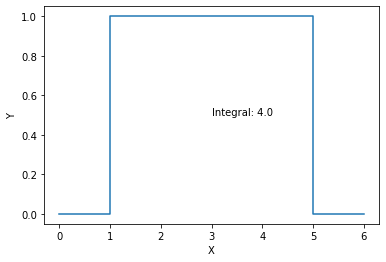

In [28]:
x = [0,1,1,2,3,4,5,5,6]
y = [0,0,1,1,1,1,1,0,0]
fig, axe = subplots()
axe.plot(x,y)
axe.set_xlabel('X')
axe.set_ylabel('Y')
numerical_integral = np.trapz(y,x)
axe.text(3, 0.5, f'Integral: {numerical_integral}')


From the latter relation between the inital slope a the surface and charge distribution on the center ($\ref{second_derivative}$) the following boundary condition for the solution is defined:
\begin{align}
\left.\frac{dV^*}{dr^{*}}\right|_{R^*}-\intop_{0}^{R^*}\left(1-n^{*}(V^{*})-\frac{2}{r^{*}}\frac{dV^{*}}{dr^{*}}\right)dr^* = 0.
\end{align}

Tle left side of the equation can be calculated for multiple values of $\left.\frac{dV^*}{dr^{*}}\right|_{R^*}$. The right value of $\left.\frac{dV^*}{dr^{*}}\right|_{R^*}$ needs to be found to minimize the left side of the equation. 
Definitely similar problems have been done before, Python/SciPy has already a solution for this ready. The tools needed to solve this problems can be found in the `scipy.optimize` package. The function `minimize_scalar` will be used to minimize the left side of the equation by varying the scalar parameter $\left.\frac{dV^*}{dr^{*}}\right|_{R^*}$.

The following line is used to load the required function: `from scipy.optimize import minimize_scalar`

To use this function, function needs to be defined, which is then minimized by changing the input parameter.
This function, which takes the inital slope as an argument, returns the "error" based on the previous equation. The algorithm should then find the best initial slope parameter to have a valid solution.

In [29]:
from scipy.optimize import minimize_scalar


def min_vdot(vdot_init, grain, vinit):
    r,v,vdot, data = grain.solve_with_values(grain.material.kT_to_J(vinit),grain.material.kT_to_J(vdot_init))
    #the integration stops when the slope is zero. This might not be in the center (r*=0) of the grain. So we will expand the datapoints appropriatly
    #for numerical reasons, we will not choose r*=0, but rather a very small r*.
    r = np.concatenate([[0.01],r], axis=0)
    #If the slope is zero, the slope should stay zero until the center
    vdot = np.concatenate([[0],vdot], axis=0)
    
    #and since the slope is zero, also the value should not change anymore
    v = np.concatenate([[v[0]],v], axis=0)
    
    #for each point of the solution the element in the integral is calculated
    integrand = [(1-grain.material.n(grain.material.kT_to_J(v_i))[0]/grain.material.nb)-2/r_i*vdot_i for r_i, v_i, vdot_i in zip(r, v, vdot)]
    
    #the integral is numerically calculated
    dV = np.trapz(y=integrand,x=r)
    
    #The integral should be the same as the slope at the surface, the differenc is the error to be minimized
    res = abs(dV-vdot[-1])
    
    #Debug output
    #print(res, vdot[-1])
    
    #return the 'error' to be minimized
    return res

def find_best_v_dot_init(E_init_kT, grain):
    #find for a given inital value E_init_kT, the correspoding E_init_dot_kT
    bounds = sorted([E_init_kT*100, 0])
    #res = minimize_scalar(min_vdot,  bounds=bounds, tol=abs(E_init_kT/10000), method='Bounded', args=(grain, E_init_kT))
    res = minimize_scalar(min_vdot,  args=(grain, E_init_kT))
    return res



So the previous example with randomly guessed initial values can be extended with a better guess.

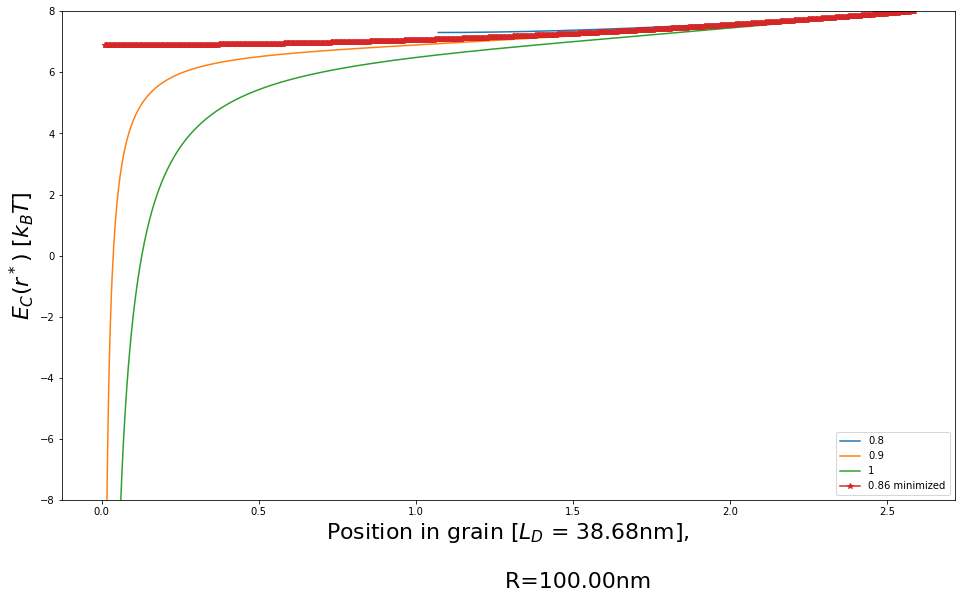

In [48]:
fig, axe = subplots(figsize = (16,9))
axe.set_ylim(-8,8)
E_init_kT = 8
E_init = grain.material.kT_to_J(E_init_kT)
for E_dot_init_kT in [0.8,0.9,1]:
    E_dot_init = grain.material.kT_to_J(E_dot_init_kT)
    r,v, v_dot, data = grain.solve_with_values(E_init, E_dot_init)


    axe.plot(r,v, label=E_dot_init_kT)
    
res = find_best_v_dot_init(E_init_kT, grain)
E_dot_init_kT = res.x
E_dot_init = grain.material.kT_to_J(E_dot_init_kT)
r,v, v_dot, data = grain.solve_with_values(E_init, E_dot_init)

axe.plot(r,v, '-*', label=f'{E_dot_init_kT:.2f} minimized')
    
axe.set_ylabel('$E_C(r^*)$ [$k_BT$]', fontsize =22)
axe.set_xlabel(f"""Position in grain [$L_D$ = {grain.material.LD*1e9:.2f}nm],\n
                    R={grain.R*1e9:.2f}nm""", fontsize =22)
axe.legend();

### Putting the pieces together
With a description of the semiconductor itself by the class `material` and the semiconductor grain by the class `grain` the screening of multiple parameters can start.
For the beginning I will define one material and calculate the resulting conduction band bending for multiple surface potential. Additionally I would like to investigate the influence of different grain sizes on the sensing performance.

Those results will lead in a second step to an understanding of the relation between surface reaction, resistance change and grain size. But for now lets concentrate on generating data for further analysis.

As we would like to do the time consuming calculations (finding the right start conditions) only once, we will save the correct solution in a `DataFrame`. As mentioned earlier, a `DataFrame` is a data structure to organize information similar to Excel Worksheets. As in "Excel Worksheets" data can be stored, accessed and manipulated. A `Dataframe` is a part of the `pandas` Python library. To shorten the command for pandas I will import it and add an alias to it. The following code part import `pandas` and creates a `Dataframe`, where all our results will be stored.

In [30]:
import pandas as pd
#The results will be saved in a DataFrame
dF_calc = pd.DataFrame()

Next, we need to create the numerical representation of the material.

In [31]:
def calcualte_conduction_band(grain):
    dF_calc_temp = pd.DataFrame()
    for vinit in [-8,-4,-2,-1,0,1,2,4,8]:
        #print(f'Solving for {vinit}')
        if vinit in dF_calc.index:
            pass
        bounds = sorted([vinit*10, 0])
        res = find_best_v_dot_init(vinit, grain)
        #res = minimize_scalar(min_vdot,  bounds=bounds, tol=abs(vinit/10000), method='Bounded')
        ser_temp = pd.Series()
        ser_temp.name = vinit
        ser_temp['Einit_kT'] = vinit
        ser_temp['E_dor_init_kT'] = res.x
        ser_temp['res'] = res.fun



        r,v,vdot, data = grain.solve_with_values(grain.material.kT_to_J(vinit),grain.material.kT_to_J(res.x), )
        r = np.concatenate([[0.01],r], axis=0)
        v = np.concatenate([[v[0]],v], axis=0)
        vdot = np.concatenate([[0],vdot], axis=0)
        ser_temp['R'] = grain.R
        ser_temp['temp'] = grain.material.T_C
        ser_temp['v'] = v
        ser_temp['v_dot'] = vdot
        ser_temp['r'] = r
        ser_temp['mass_eff'] = grain.material.MASS_E_EFF
        ser_temp['ND'] = grain.material.ND
        ser_temp['EPSILON'] = grain.material.EPSILON
        ser_temp['nb'] = grain.material.nb
        
        n = [grain.material.n(v_J)[0] for v_J in grain.material.kT_to_J(v)]
        ser_temp['n'] = n
        surf_charges = np.trapz((np.array(4*pi*ser_temp['n']))*(ser_temp['r']*grain.material.LD)**2, ser_temp['r']*grain.material.LD)
        all_charges = 4/3*pi*(ser['R']**3)*grain.material.nb
        ser_temp['trapped_charges'] = surf_charges
        ser_temp['all__charges'] = all_charges
        dF_calc_temp = dF_calc_temp.append(ser_temp)
    return dF_calc_temp


def calc_solution_by_parameters(T_C, ND, grainsize):
    grain = create_grain(grainsize, ND=ND, T_C=T_C)
    dF_calc_temp = calcualte_conduction_band(grain)
    return dF_calc_temp






# create a list of the tuples with (T_C, ND, Grainradius) to be alter caluculated in parallel
params = []
T_C = 300
ND_ref = 9e21
for ND in [ND_ref/2,ND_ref, ND_ref*2]:
    for grainsize in [50e-9, 100e-9, 200e-9, 400e-9]:
        params.append((T_C, ND, grainsize))

print(params)

#using multiple processors of the system to calculate the solutions in parallel.
#All solution is are returned in a list, which needs then to be combined again (see next cell)
from multiprocessing import Pool
with Pool(8) as p:
    all_res_list = p.starmap(calc_solution_by_parameters, params)
        
        


[(300, 4.5e+21, 5e-08), (300, 4.5e+21, 1e-07), (300, 4.5e+21, 2e-07), (300, 4.5e+21, 4e-07), (300, 9e+21, 5e-08), (300, 9e+21, 1e-07), (300, 9e+21, 2e-07), (300, 9e+21, 4e-07), (300, 1.8e+22, 5e-08), (300, 1.8e+22, 1e-07), (300, 1.8e+22, 2e-07), (300, 1.8e+22, 4e-07)]


In [32]:
dF_calc = pd.concat(all_res_list)
dF_calc.index = range(len(dF_calc))

... or screen even some more parameters ...

#### Export/Import data
The date will be saved for later use and to avoid a recalcualtion.
It is helpful to directly reimport the data to see if any mistakes in saving the date have happened.


In [39]:
dF_calc.to_hdf('results.h5', 'raw', mode='w')

In [40]:
calc_dF_all = pd.read_hdf('results.h5', 'raw')

In [41]:
def create_grain_from_data(dF):
    if type(dF)==pd.Series:
        dF = pd.DataFrame([dF])
        
    if len(dF['temp'].unique())==1:
        T_C = dF['temp'].unique()[0]
    else:
        raise Exception('Multiple paramters for one grain are invalid.')
    
    if len(dF['ND'].unique())==1:
        ND = dF['ND'].unique()[0]
    else:
        raise Exception('Multiple paramters for one grain are invalid.')
    
    if len(dF['mass_eff'].unique())==1:
        mass_e_eff_factor = dF['mass_eff'].unique()[0]/CONST.MASS_E 
    else:
        raise Exception('Multiple paramters for one grain are invalid.')
    
    if len(dF['R'].unique())==1:
        grainsize_radius = dF['R'].unique()[0]
    else:
        raise Exception('Multiple paramters for one grain are invalid.')
        

    

    material = Material(T_C,ND)
    grain = Grain(grainsize_radius=grainsize_radius,material=material)
    
    return grain


### Represent the results

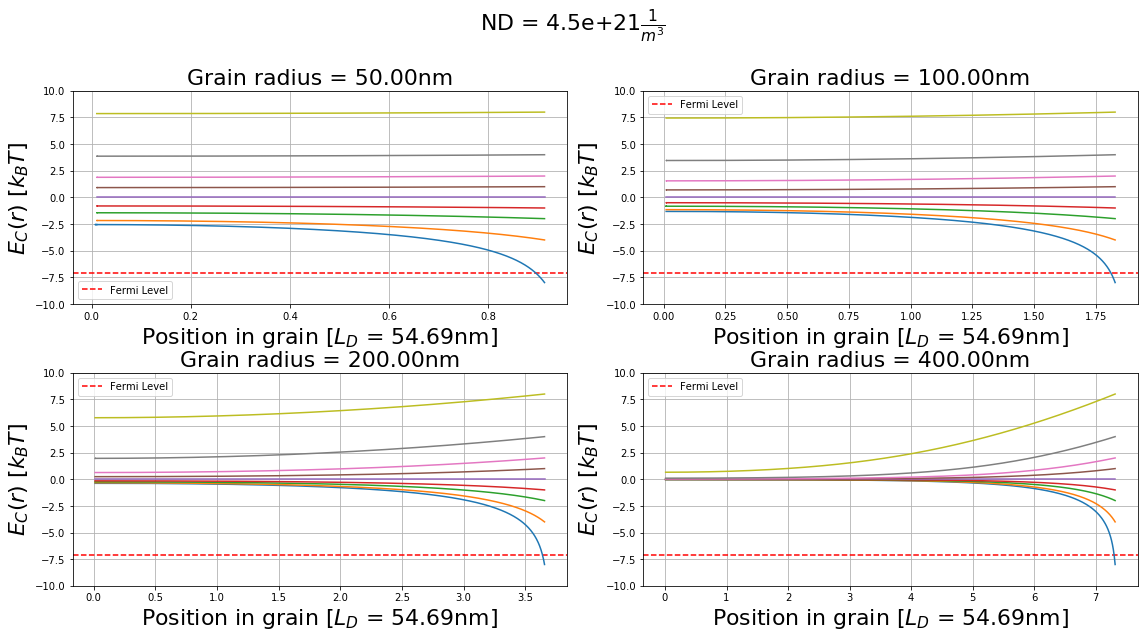

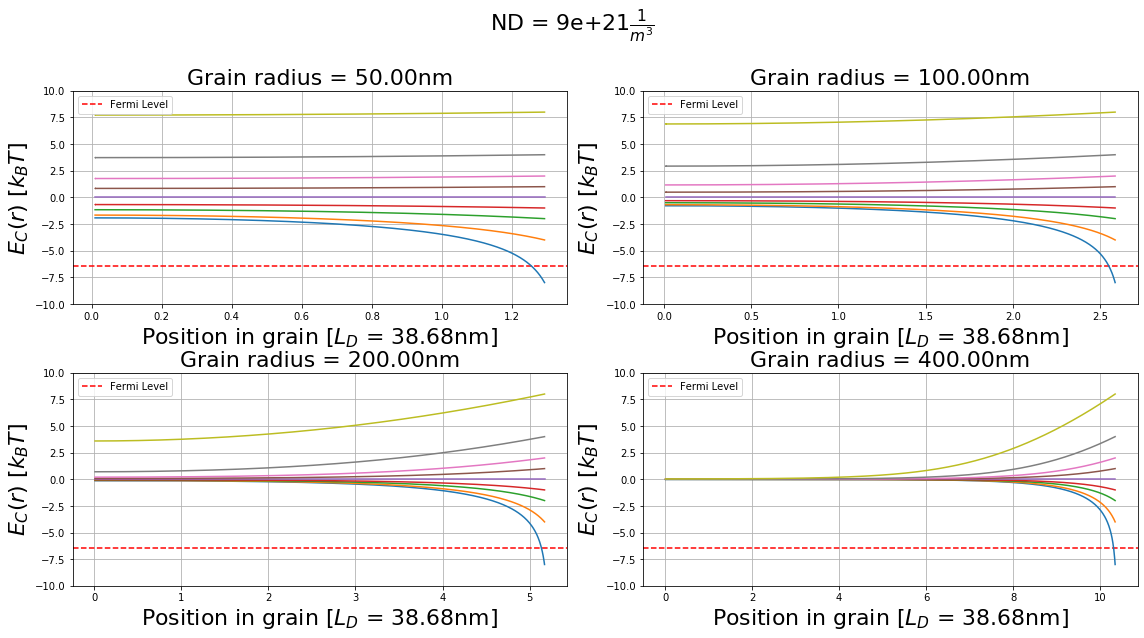

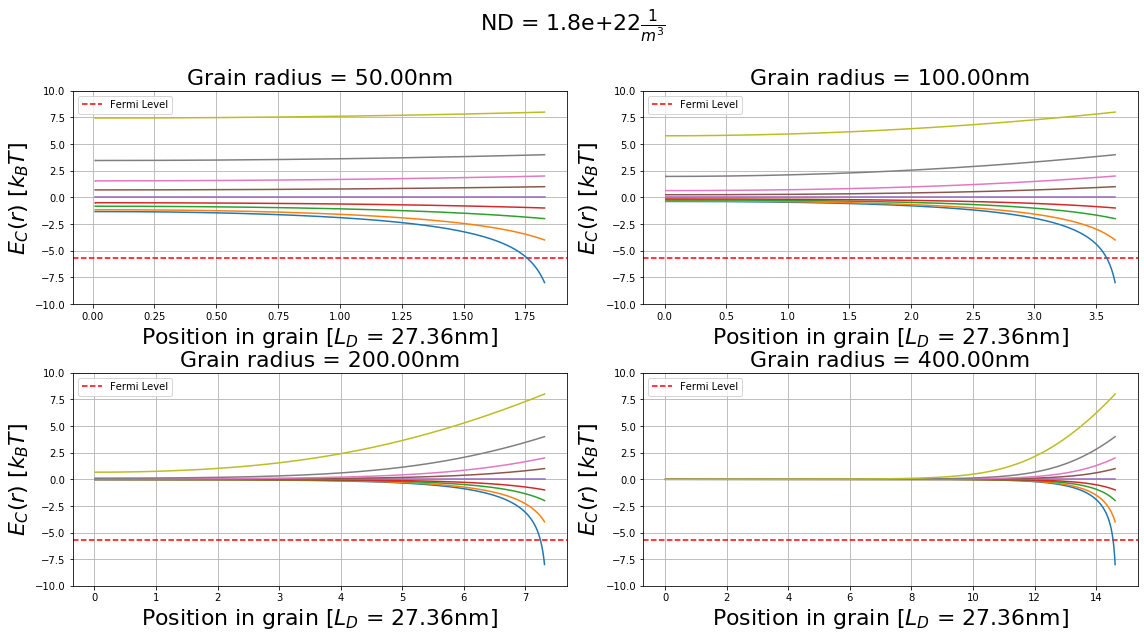

In [42]:

for ND, calc_dF in calc_dF_all.groupby('ND'):
    fig, axes= subplots(2,2,figsize = (16,9), sharex=False)
    fig.suptitle(f'ND = {ND}'+ r'$\frac{1}{m^3}$', fontsize = 22)
    #fig.suptitle(f'$\\num{{{2e-10}}}$', fontsize = 22)
    
    for ax_i, (R, calc_dF_grainsize) in enumerate(calc_dF.groupby('R')):
        axe = fig.axes[ax_i]

        grain = create_grain_from_data(calc_dF_grainsize)


        axe.axhline(-grain.material.J_to_kT(grain.material.Diff_EF_EC),
                    linestyle='--',color='r', label='Fermi Level')
        axe.set_ylim(-10,10)

        for vinit, ser_temp in calc_dF_grainsize.iterrows():

            r = ser_temp['r']
            v = ser_temp['v']
            vdot = ser_temp['v_dot']

            axe.set_title(f'Grain radius = {grain.R*1e9:.2f}nm', fontsize=22)

            axe.plot(r,v, '-', label = "")
            axe.set_ylabel('$E_C(r)$ [$k_BT$]', fontsize =22)
            axe.set_xlabel(f'Position in grain [$L_D$ = {grain.material.LD*1e9:.2f}nm]',
                           fontsize =22)
        axe.legend()
        axe.grid(b=True)
        #axe.set_xlim(0,40)
    fig.tight_layout()
    fig.subplots_adjust(top=.85)
    close()
    display(fig)
    for i in range(5):print()

# Summary
In this notebook the flowowing steps have been accomplished:

- numerically calculate the charge density in a semiconductor
- solve the Poisson equation for spherical grains
- Calculate the solutions for multiple grain sizes and surface potentials

Those calculations have been derived with a standard set of Python tools. By using mainly the `numpy`, `scipy`, `matplotlib` and `pandas` these results have been achieved.

To avoid a to large blocks of information in one notebook I like to introduce a breakpoint here. At such breakpoints it is helpful to save all the relevant gathered data in a `DataFrame`, save it to the filesystem, and pick it up again in a fresh notebook. This keeps each notebooks close to one topic and and introduces directly structure in the data.

In the next notebook this calculated date will be used derive the total resistance of a grain under different conditions. The anisotropic charge carrier distribution inside the grain has a mayor influence on the total resistance. For two extreme cases, the conduction path inside the grain  differs a lot. Those cases are:

1. Accumulation layer at the surface
2. Depletion layer at the surface

In the case of 1., the current will most likely run along the highly conductive surface of the grain. In the second case, the current will need to overcome a highly resistive surface layer and then propagate through the inside of the relatively low resistive bulk of the grain.

Since all information to numerically derive the effects are now pre-calcualted, the next notebook will start at this point and continue to calcualte the total resistance.[Non-PDF readers, could use this link to guide them to the next notebook.](./3-Resistance-sensor.ipynb)


This graph shows how a surface potential is shielded by the remaining ionized donors. In the case of on deletion layer ( $E_{C_{Surface}}>0 )$), the total number of charges shielding the surface potential is rather small compared to the amount of charges in an accumulation layer ( $E_{C_{Surface}}<0 )$). The result of such an asymmetry is visible in the graph. The width of the accumulation layer is by far smaller then the width of the depleted are.

# Bibliography section

%%latex
\bibliographystyle{alphadin}
\bibliography{ipython}